# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Exploratory Data Analysis 

In [18]:
df = pd.read_csv("data/Advertising.csv", index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,TV,radio,sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14022.500000
std,85.854236,14.846809,5217.456566
min,0.700000,0.000000,1600.000000
25%,74.375000,9.975000,10375.000000
50%,149.750000,22.900000,12900.000000
75%,218.825000,36.525000,17400.000000
max,296.400000,49.600000,27000.000000


In [19]:
df["newpaper"] = df["newpaper"].str.replace("s", "").astype(float)
df["sales"] = df["sales"].round()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    float64
 3   sales     200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


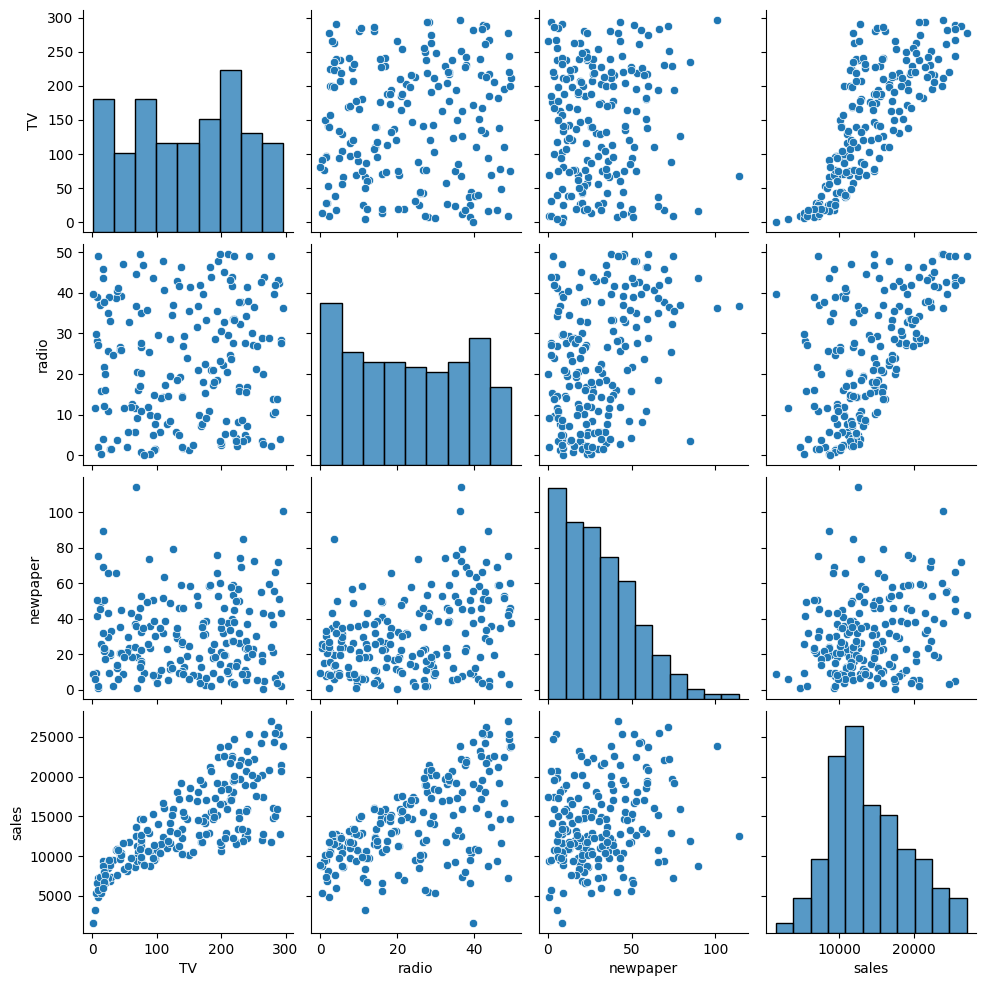

In [8]:
sns.pairplot(df)

<Axes: >

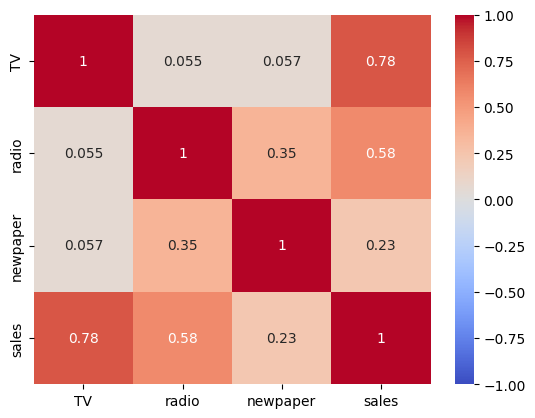

In [9]:
sns.heatmap(df.corr(), annot= True, cmap="coolwarm", vmin=-1)

In [20]:
df.describe()

,TV,radio,newpaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


## Modelado

In [11]:
X = df.drop(columns=["sales"])
y = df["sales"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state= 11)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(180, 3)
(180,)
(20, 3)
(20,)


### Modelo de Linear Regression.

In [43]:
lm_1 = LinearRegression()
lm_1.fit(X_train, y_train)

pred = lm_1.predict(X_test)


print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("RMSE: ", metrics.root_mean_squared_error(y_test, pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("R2: ", metrics.r2_score(y_test, pred))

MAE:  1634.4001766856586
MSE:  6316064.95375604
RMSE:  2513.178257457286
MAPE:  0.39803011696555113
R2:  0.8213651186525016


### Modelo regresión polinomica.

In [25]:
grados = [2, 3, 4, 5, 6, 7]

for i in grados:
    rgm = PolynomialFeatures(degree=i)
    rgm.fit(X_train)
    X_train_poly = rgm.transform(X_train)
    X_test_poly = rgm.transform(X_test)

    lm_p = LinearRegression()
    lm_p.fit(X_train_poly, y_train)
    pred = lm_p.predict(X_test_poly)

    print(i)
    print("MAE: ", metrics.mean_absolute_error(y_test, pred))
    print("MSE: ", metrics.mean_squared_error(y_test, pred))
    print("RMSE: ", metrics.root_mean_squared_error(y_test, pred))
    print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
    print("R2: ", metrics.r2_score(y_test, pred))
    print("___________________")

2
MAE:  719.0083387248173
MSE:  1752650.0263125703
RMSE:  1323.8768924309277
MAPE:  0.21213551014482337
R2:  0.950430460771647
___________________
3
MAE:  592.6579995266887
MSE:  1284551.6720128471
RMSE:  1133.3806386262504
MAPE:  0.17636134683428556
R2:  0.9636695098617871
___________________
4
MAE:  555.7207034508267
MSE:  1108437.7549882042
RMSE:  1052.8237055595796
MAPE:  0.16541933332145292
R2:  0.9686504733100226
___________________
5
MAE:  1432.3032428835859
MSE:  22097175.45014199
RMSE:  4700.763283780836
MAPE:  0.17750230607908773
R2:  0.37503392641591327
___________________
6
MAE:  1381.9221104594455
MSE:  19235333.596637808
RMSE:  4385.8104834383585
MAPE:  0.1624215342728694
R2:  0.45597431947377887
___________________
7
MAE:  11969.445682956562
MSE:  2614772397.319483
RMSE:  51134.845236095935
MAPE:  1.0066370100880555
R2:  -72.95262087482345
___________________


### Modelo polinomico de 4 con standar scaler

In [42]:
st = StandardScaler()
st.fit(X_train)
X_train_st = st.transform(X_train)
X_test_st = st.transform(X_test)

pol_m = PolynomialFeatures(degree=4)
pol_m.fit(X_train_st)
X_train_pol_4 = pol_m.transform(X_train_st)
X_test_pol_4 = pol_m.transform(X_test_st)

lm_2 = LinearRegression()
lm_2.fit(X_train_pol_4, y_train)
pred = lm_2.predict(X_test_pol_4)

print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("RMSE: ", metrics.root_mean_squared_error(y_test, pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("R2: ", metrics.r2_score(y_test, pred))
print("___________________")

MAE:  555.720703436705
MSE:  1108437.7009640117
RMSE:  1052.8236799027707
MAPE:  0.16541932816866028
R2:  0.9686504748379685
___________________


In [31]:
lm.intercept_

np.float64(14531.688440682245)

In [48]:
lm_2.coef_

array([-2.30181128e-10,  2.97484180e+03,  2.92591421e+03, -1.12850586e+02,
       -4.30385524e+01,  1.20459916e+03, -5.99345664e+01, -1.82990286e-01,
       -7.23472760e+01,  5.42867164e+01,  4.05683517e+02, -8.51335026e+01,
        1.28308598e+02, -5.22672947e+01,  8.38560727e+01, -4.72770890e+00,
        1.83856440e+01,  3.23160631e+01, -6.11679602e+01,  3.31837869e+01,
       -2.62586600e+02, -4.18641707e+01,  1.65893370e+01, -2.40444606e+00,
       -1.05976401e+02,  3.76333066e+01,  1.01223783e+02, -5.73922899e+01,
        5.22840637e+01, -1.73534796e+01, -5.89996697e+00,  1.57623947e+01,
        5.57927163e+01,  2.04759957e+01, -2.31056446e+01])

In [49]:
intercept_scal = lm_1.intercept_
features_std = pd.DataFrame(lm_1.coef_, X.columns, columns=["coefficient"])
features_std.sort_values('coefficient', ascending=False)

,coefficient
radio,193.685149
TV,44.585912
newpaper,-5.348020


In [45]:
features_std

,coefficient
TV,44.585912
radio,193.685149
newpaper,-5.348020


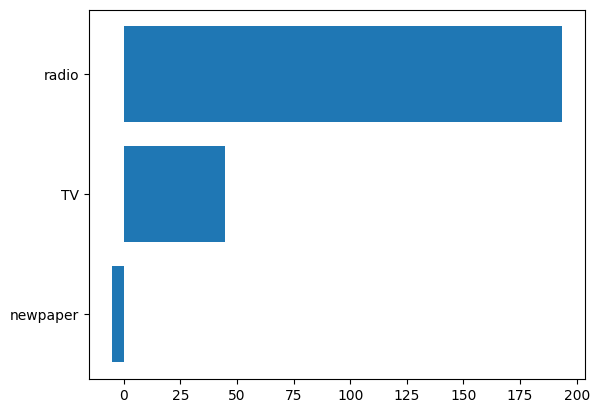

In [50]:
import matplotlib.pyplot as plt
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

### Ridge.


In [55]:
import numpy as np

In [71]:
alphas = np.logspace(-4,3, 100)

coef = []
error = []
baseline = []

for i in alphas:
    ridge = Ridge(alpha= i)
    ridge.fit(X_train_st, y_train)

    pred = ridge.predict(X_test_st)

    error.append(metrics.mean_squared_error(y_test, pred))
    baseline.append(6316064)




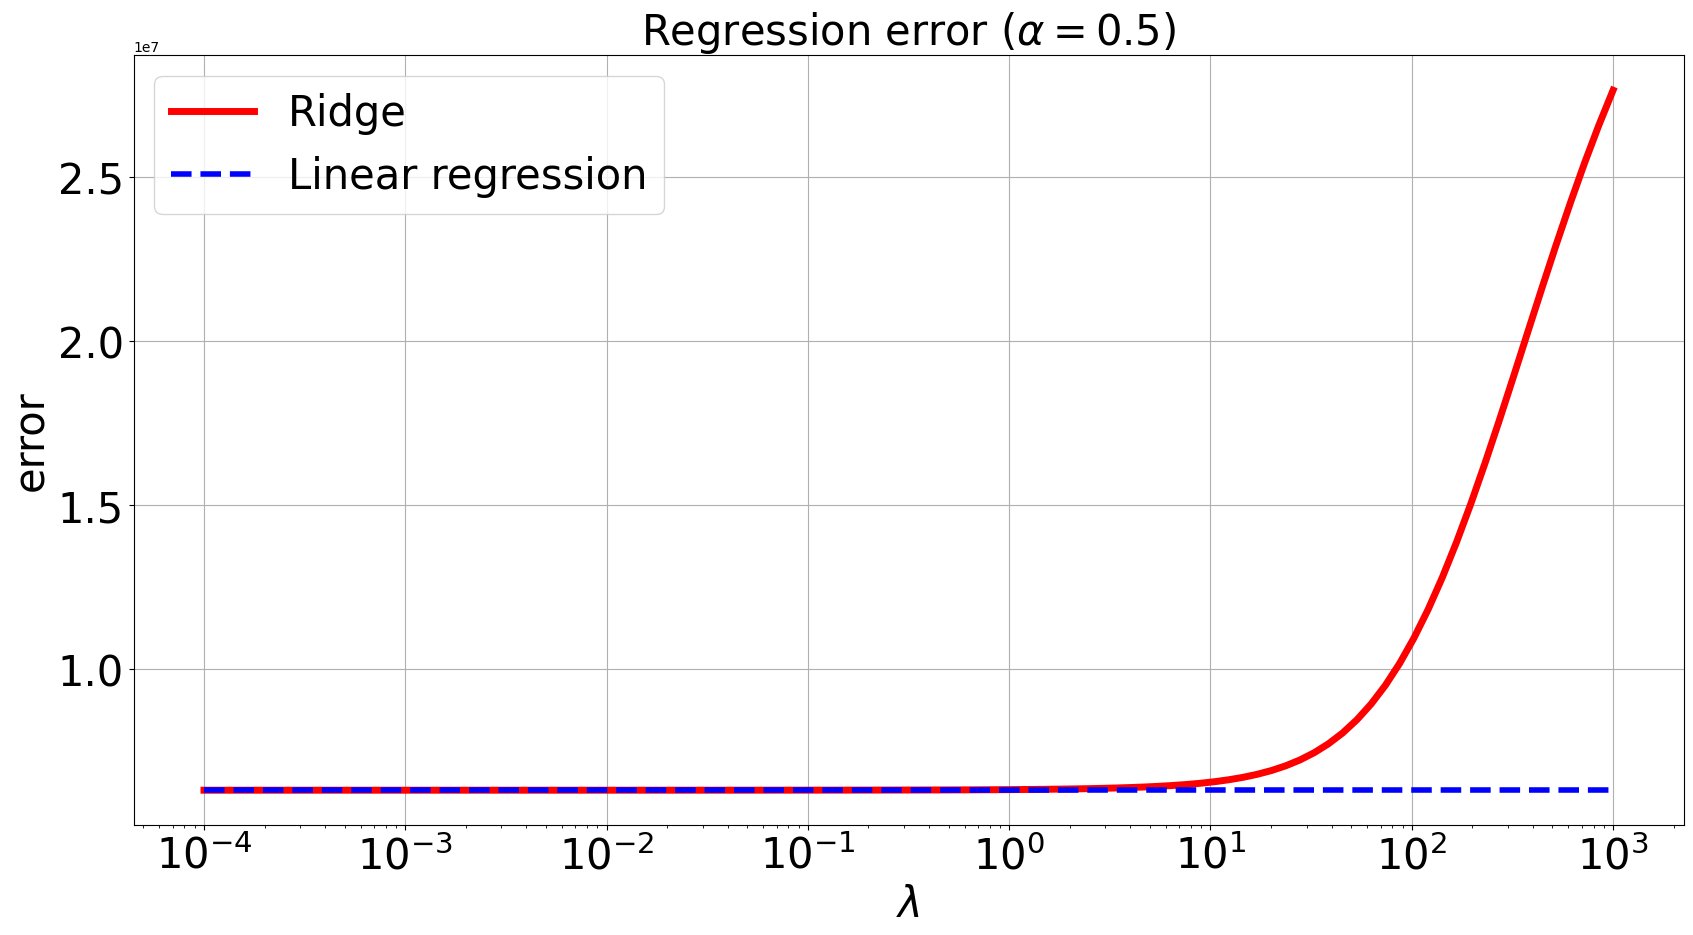

In [72]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, error, linewidth=5, color='red', label="Ridge")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\alpha=0.5$)', fontsize=30)
plt.show()

In [77]:
intercept_scal = ridge.intercept_
features_std = pd.DataFrame(ridge.coef_, X.columns, columns=["coefficient"])
features_std.sort_values('coefficient', ascending=False)

,coefficient
TV,2875.445666
radio,1863.044770
newpaper,0.000000


In [73]:
lasso = Lasso(alpha= 0.01)
lasso.fit(X_train_st, y_train)

pred = lasso.predict(X_test_st)

print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("RMSE: ", metrics.root_mean_squared_error(y_test, pred))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, pred))
print("R2: ", metrics.r2_score(y_test, pred))
print("___________________")


MAE:  1634.4031144329124
MSE:  6316051.536039807
RMSE:  2513.1755879842153
MAPE:  0.3980301199464133
R2:  0.8213654981407059
___________________


In [74]:
alphas = np.logspace(-4,3, 100)

coef = []
error = []
baseline = []

for i in alphas:
    ridge = Lasso(alpha= i)
    ridge.fit(X_train_st, y_train)

    pred = ridge.predict(X_test_st)

    error.append(metrics.mean_squared_error(y_test, pred))
    baseline.append(6316064)


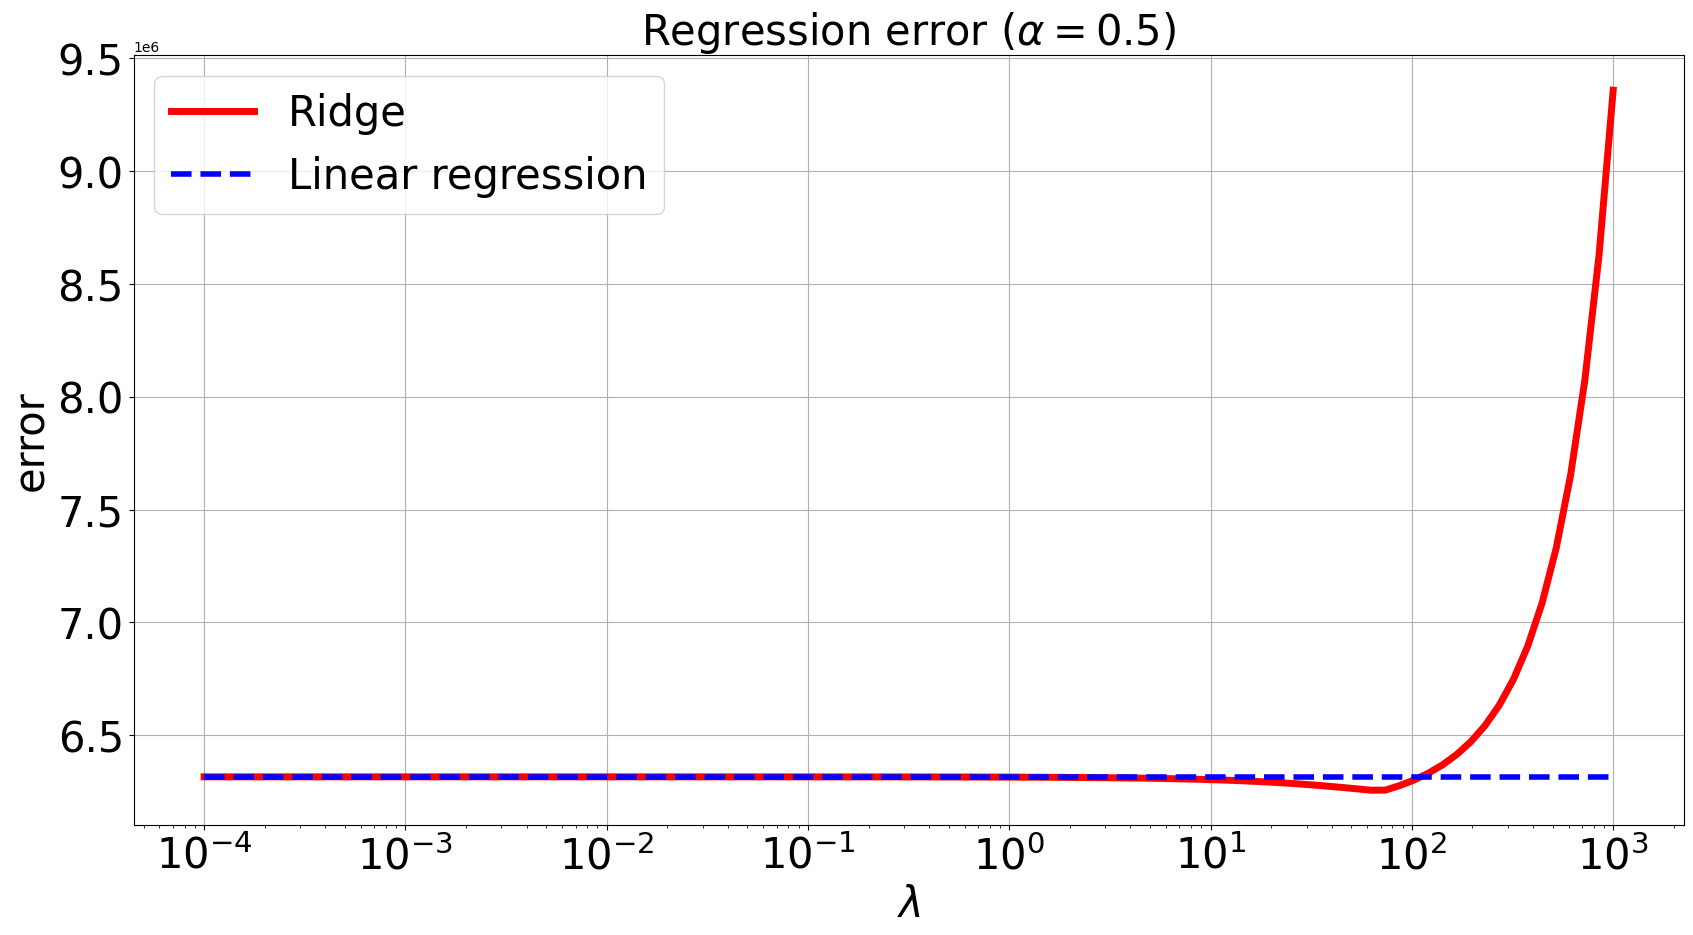

In [75]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, error, linewidth=5, color='red', label="Ridge")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\alpha=0.5$)', fontsize=30)
plt.show()

In [76]:
intercept_scal = lasso.intercept_
features_std = pd.DataFrame(lasso.coef_, X.columns, columns=["coefficient"])
features_std.sort_values('coefficient', ascending=False)

,coefficient
TV,3833.224445
radio,2849.581136
newpaper,-112.104701
